In [1]:
import numpy as np 
import time 
import os  
import xarray as xr
import subprocess
import matplotlib.pyplot as plt
from matplotlib import colors
import cartopy.crs as ccrs

In [2]:
## import self defined functions
from sys import path 
# insert at 1, 0 is the script path (or '' in REPL)
path.insert(1, '/tigress/cw55/local/python_lib')
from cg_funcs import global_mean_xarray 

In [3]:
plt.rcParams['font.size'] = '6'

In [4]:
year_list = [1990,2010]
test_year_list = [1994,2004]

In [25]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/'
dssst = xr.open_dataset(file_path+'/INPUT/hadisst_sst.data.nc').sst.sel(lat=slice(-60,60)).sel(time=slice(str(year_list[0]),str(year_list[-1])))
dssst_clm = xr.open_dataset('./hadisst_sst_ctl.data.nc').sst.sel(lat=slice(-60,60)) .sel(time=slice(str(year_list[0]),str(year_list[-1])))
gm1 = global_mean_xarray(dssst.groupby('time.year').mean('time'))
gm2 = global_mean_xarray(dssst_clm.mean('time')) 
ts_anom = dssst.groupby('time.month') - dssst_clm.groupby('time.month').mean('time')
nino34 = ts_anom.sel(lon = slice(190,240)).sel(lat = slice(-5,5)).mean(['lat','lon']).rolling(time=12,center=True).mean() 

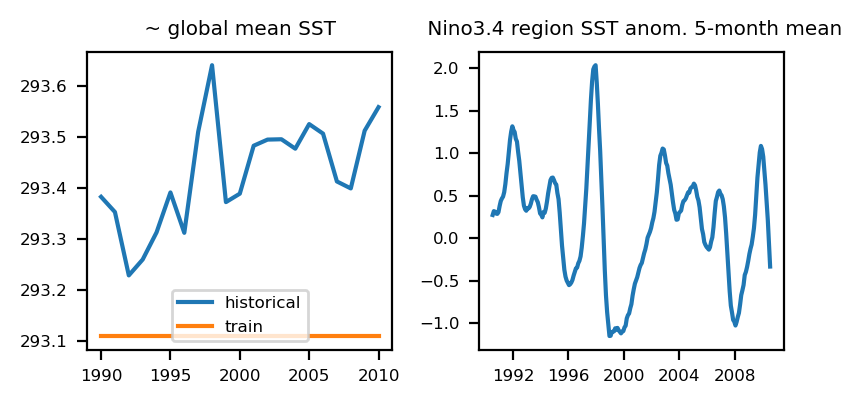

In [30]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(4,2),dpi=200)

axs[0].plot(gm1.year,gm1, label='historical')
# axs[0].scatter(gm1.year,gm1, label='test')
axs[0].plot([gm1.year[0],gm1.year[-1]],[gm2,gm2], label='train')  
axs[0].set_title(' ~ global mean SST ')
axs[0].legend(fontsize=6) 

axs[1].plot(nino34.time,nino34)  
axs[1].set_title(' Nino3.4 region SST anom. 5-month mean')
fig.tight_layout()